## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

In [7]:
import pandas as pd
import numpy as np
from plotnine import *
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1")
df

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease
...,...,...,...,...,...,...,...,...,...
199,Bridgett Franecki,55,0,1,128,205,2,130,No Disease
200,Mr. Foster Zieme,51,1,3,94,227,1,154,Disease
201,Lashanda Hagenes,42,1,2,120,295,1,162,Disease
202,Levern Trantow III,35,0,1,138,183,1,182,Disease


## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [8]:
X = df[['age', 'chol']]
y = df['diagnosis']

logistic_model = Pipeline(
  [("standardize", StandardScaler()),
  ("logistic", LogisticRegression())]
)

logistic_model_fitted = logistic_model.fit(X, y)

logistic_model_fitted

Pipeline(steps=[('standardize', StandardScaler()),
                ('logistic', LogisticRegression())])

In [17]:
logistic_model_fitted.named_steps['logistic'].coef_, logistic_model_fitted.named_steps['logistic'].intercept_

logistic_age_coef = logistic_model_fitted.named_steps['logistic'].coef_[0][0];logistic_age_coef
logistic_chol_coef = logistic_model_fitted.named_steps['logistic'].coef_[0][1];logistic_chol_coef
logistic_intercept = logistic_model_fitted.named_steps['logistic'].intercept_;logistic_intercept

# From cell jHAKF41kzed_ output
age_mean = df['age'].mean();age_mean
age_std = df['age'].std();age_std
chol_mean = df['chol'].mean();chol_mean
chol_std = df['chol'].std();chol_std

age = 55

#Standardize age
age55_std = (age - age_mean) / age_std

#1. Cholesterol for predicting heart disease is present (score >= 0, or probability >= 0.5)
#Set the logistic regression score to 0 to find the decision boundary.
#0 = intercept + age_coef * age_std_for_given_age + chol_coef * chol_std_target
#Solve for chol_std_target:
chol_std_target_for_prob_0_5 = (-logistic_intercept - logistic_age_coef * age55_std) / logistic_chol_coef

# Convert cholesterol back to original scale
chol_for_prob_0_5 = chol_mean + chol_std * chol_std_target_for_prob_0_5

print(f"For a {age}-year-old, cholesterol needs to be approximately {chol_for_prob_0_5[0]:.2f} for disease to be predicted (probability >= 0.5).")

target_score_for_prob_0_9 = -np.log((1 / 0.9) - 1)

# Solve for chol_std_target_for_prob_0_9:
chol_std_target_for_prob_0_9 = (target_score_for_prob_0_9 - logistic_intercept - logistic_age_coef * age55_std) / logistic_chol_coef

# Convert standardized cholesterol back to original scale
chol_for_prob_0_9 = chol_mean + chol_std * chol_std_target_for_prob_0_9

print(f"For a {age}-year-old, cholesterol needs to be approximately {chol_for_prob_0_9[0]:.2f} for an estimated 90% chance of disease.")

For a 55-year-old, cholesterol needs to be approximately 368.09 for disease to be predicted (probability >= 0.5).
For a 55-year-old, cholesterol needs to be approximately 1585.49 for an estimated 90% chance of disease.


## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_model = Pipeline(
  [("standardize", StandardScaler()),
  ("lda", LinearDiscriminantAnalysis())]
)

lda_model_fitted = lda_model.fit(X, y)

lda_model_fitted

Pipeline(steps=[('standardize', StandardScaler()),
                ('lda', LinearDiscriminantAnalysis())])

In [21]:
age = 55

# Standardize age using the StandardScaler from the fitted pipeline
age_std_scaler = lda_model_fitted.named_steps['standardize'].mean_[0]
age_std_std = lda_model_fitted.named_steps['standardize'].scale_[0]
age55_std = (age - age_std_scaler) / age_std_std

# Get the coefficients and intercept from the fitted LDA model
lda_coef = lda_model_fitted.named_steps['lda'].coef_[0]
lda_intercept = lda_model_fitted.named_steps['lda'].intercept_[0]

# Coefficients for standardized age and cholesterol
lda_age_coef = lda_coef[0]
lda_chol_coef = lda_coef[1]

# For LDA, the decision boundary is when the score is 0.
# score = lda_intercept + lda_age_coef * age55_std + lda_chol_coef * chol_std_target
# Solve for chol_std_target when score = 0
chol_std_target = (-lda_intercept - lda_age_coef * age55_std) / lda_chol_coef

# Convert standardized cholesterol back to original scale
chol_mean_scaler = lda_model_fitted.named_steps['standardize'].mean_[1]
chol_std_std = lda_model_fitted.named_steps['standardize'].scale_[1]
chol_for_prediction = chol_mean_scaler + chol_std_std * chol_std_target

print(f"For a {age}-year-old, cholesterol needs to be approximately {chol_for_prediction:.2f} for disease to be predicted by the LDA model.")

For a 55-year-old, cholesterol needs to be approximately 368.24 for disease to be predicted by the LDA model.


## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

X = df[['age', 'chol']]
y = df['diagnosis']

# Define parameter grid for tuning regularization parameter C
param_grid = {'svc__C': [0.01, 0.1, 1, 10, 100]}

svc_pipeline = Pipeline(
  [("standardize", StandardScaler()),
  ("svc", SVC(kernel="linear", probability=True))]
)

svc_pipeline_grid = GridSearchCV(svc_pipeline, param_grid, cv=5)
svc_pipeline_grid.fit(X, y)

# Best fitted pipeline & the SVC inside it
svc_pipeline_best = svc_pipeline_grid.best_estimator_
svc_model_best = svc_pipeline_best.named_steps["svc"]

svc_model_best

svc_age_coef  = svc_model_best.coef_[0][0]
svc_chol_coef = svc_model_best.coef_[0][1]
svc_intercept = svc_model_best.intercept_[0]

# Get the means and standard deviations from the scaler for 'age' and 'chol'
mean_age = scaler.mean_[0]
std_age = scaler.scale_[0]
mean_chol = scaler.mean_[1]
std_chol = scaler.scale_[1]

# Given age
age_val = 55
scaled_age_val = (age_val - mean_age) / std_age

# For SVC, the decision boundary is when the decision function is 0.
# decision_function = intercept + coef_age * scaled_age + coef_chol * scaled_chol = 0
# Solve for scaled_chol:
# scaled_chol = (-intercept - coef_age * scaled_age) / coef_chol
scaled_chol_for_prediction = (-intercept - svc_age_coef * scaled_age_val) / svc_chol_coef

# Convert back to original cholesterol scale
chol_for_prediction = scaled_chol_for_prediction * std_chol + mean_chol

print(f"For a {age_val}-year-old, cholesterol needs to be approximately {chol_for_prediction:.2f} for disease to be predicted by the SVC model.")


For a 55-year-old, cholesterol needs to be approximately 312.75 for disease to be predicted by the SVC model.


## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

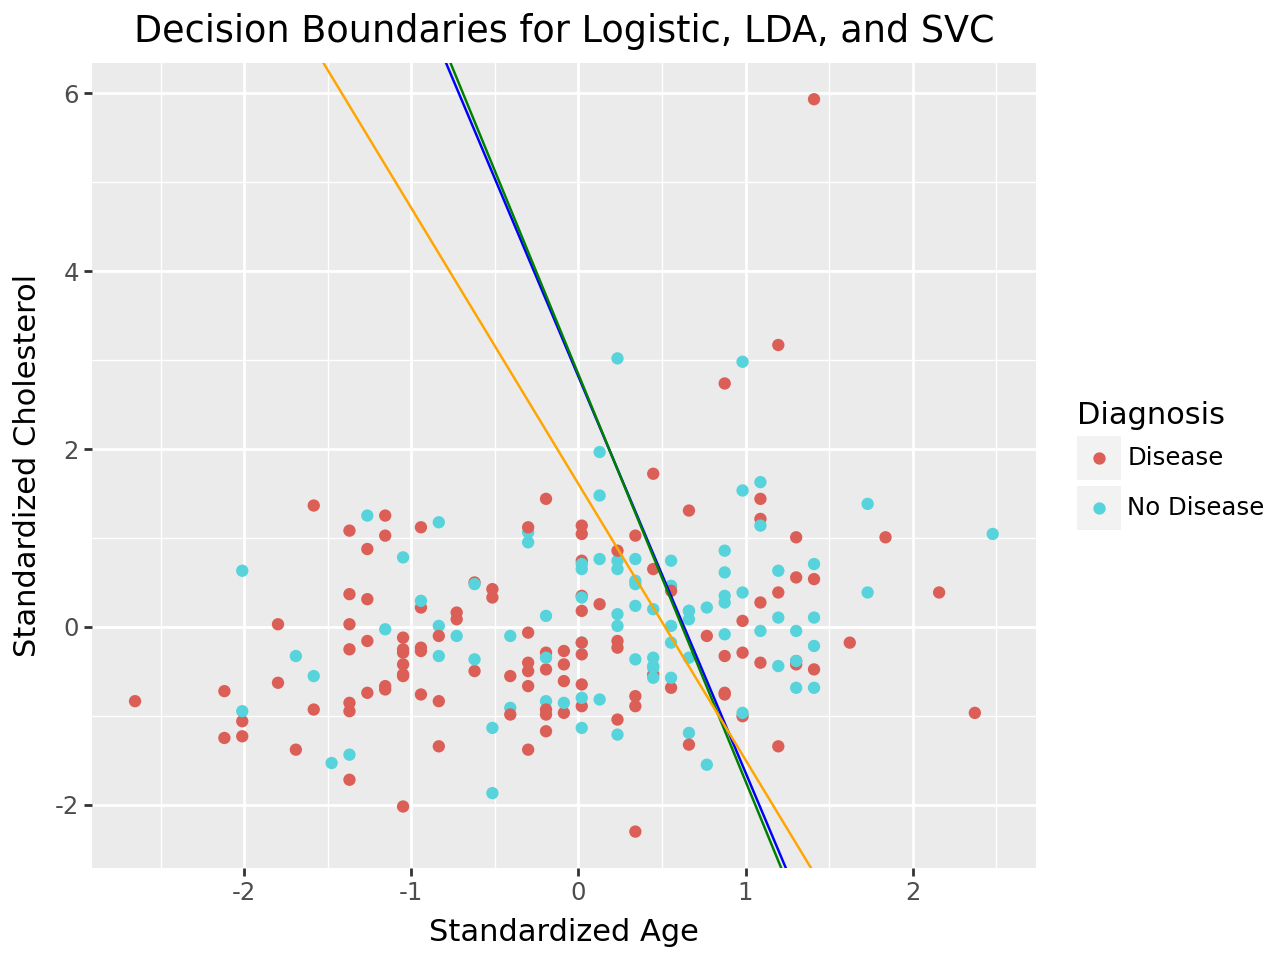

In [51]:
#all three decision boundaries
(
    ggplot(df, aes(x="age_std", y="chol_std", color="diagnosis"))
    + geom_point()
    # Logistic Regression boundary
    + geom_abline(
        intercept=-logistic_intercept / logistic_chol_coef,
        slope=-logistic_age_coef / logistic_chol_coef,
        color="blue"
    )
    # LDA boundary
    + geom_abline(
        intercept=-lda_intercept / lda_chol_coef,
        slope=-lda_age_coef / lda_chol_coef,
        color="green"
    )
    # SVC boundary
    + geom_abline(
        intercept=-svc_intercept / svc_chol_coef,
        slope=-svc_age_coef / svc_chol_coef,
        color="orange"
    )
    + labs(
        title="Decision Boundaries for Logistic, LDA, and SVC",
        x="Standardized Age",
        y="Standardized Cholesterol",
        color="Diagnosis"
    )
)
